## C S 329E HW 10

* Erika Noda (edn427)

* Victor Fonseca (vrf262)


# Clustering with K-means and DBSCAN

For this week's homework we are going explore two clustering methods:

  - K-Means, and
  - DBSCAN
  
As we discussed in lecture, k-means creates clusters based on a distance measure, and DBSCAN creates clusters based on the density of the points in the vicinity of the data.  Using small example data sets, we will implement both algorithms and visualize the results.

Even though the example data is small and 2 dimensional, write your helper functions to not assume a 2-D data set.  Your plotting code can reference the `x` and `y` column names from the sample data directly. 

Note that I have added a one or two lines of code to the questions to test your implementations. 

In [1]:
# Do not import anything else
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\Users\erika\AppData\Local\Temp\ipykernel_13200\4077088574.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Part 1 : K-Means

In the first half of the homework, we will implement the Algorithm 7.1 "Basic K-means", and apply that algorithm to a small data set provided with the assignment in the `data_kmeans.csv` file. We will build up some helper functions along the way, test them, and put it all together to apply to our small example data set. 

In [2]:
# loading in our toy data
df_kmeans = pd.read_csv('data_kmeans.csv')

## Q1.1 - Write a function that returns `k` random rows from a data frame

To initialize the centroids, we pick `k` random points from a data frame.  Write a function `init_centroids( df_data, k )` that accepts two parameters: a data frame `df_data`, and an integer `k`, and returns the initial centroids for our k-means algorithm.  Note, we want the indices of the returned data frame to range from 0 - (k-1) so that we can use these as the centroid labels.  Use [pandas sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) method, and pass it the value of $42$ for `random_state`. 

In [3]:
def init_centroids( df_data, k ):
    return df_data.sample(n=k, random_state=42)

In [4]:
# Testing our init centroid function
df_centroids = init_centroids( df_kmeans, 7 )
df_centroids

,x,y
407,-0.633437,0.488756
444,-0.597736,0.632194
117,-0.635867,0.166613
30,-0.539351,-0.875532
415,-0.588597,0.293062
157,-0.127985,-0.136639
325,0.342579,0.211717


## Q1.2 - Write a function to assign every row in a data frame to a centroid 

Write a function, `assign_to_centroid`, that accepts two parameters: a data frame, `df_data`, that represents our data to be clustered, and the data frame, `df_centroids`, which is of length `k` and contains the current centroids for our clusters.  The functions returns a series of the same length of `df_data` that contains the index of the closest centroid in `df_centroid`.  Use Euclidean distance as your distance measure. 

For example, if a row of data contained the data point $(100,123)$ and the three centroids were in a data frame that had the following information:

  - Index 0 : (34,34)
  - Index 1 : (0,1)
  - Index 2 : (83,99)

The `assign_to_centroid` function would assign the index $2$ to that row of data. 

In [5]:
import math 
def assign_to_centroid( df_data, df_centroids ):
    centList = []

    for row in df_data.iterrows():
        dp = row[1]
        minDis = 10000000
        centListIndex = 0
        
        for centIndex, centPoint in df_centroids.iterrows():
            distance = math.dist(dp, centPoint)
            if distance < minDis:
                minDis = distance
                centListIndex = centIndex

        centList.append(centListIndex)

    return pd.Series(centList, index=df_data.index)

In [6]:
# Check how many data points were assigned to each centroid
s_centroid_assignment = assign_to_centroid( df_kmeans, df_centroids )
s_centroid_assignment.value_counts()

325    126
444     94
30      71
157     58
407     53
117     26
415     22
Name: count, dtype: int64

## Q1.3 - Write a function that recomputes the centroids

Write a function `compute_centroids` that takes two parameters: the data frame, `df_data` containing the data being clustered, and a series of the same length that contains the label of the assigned centroid for every row in df_data, `s_centroid_assignment`. The function will return the a data frame containing the centroids (mean) value for each unique centroid. 

Note that the indices in the returned data frame should correspond to the unique values in `s_centroid_assignment`.  For example, if I found the mean value of df_data using the slice corresponding to `s_centroid_assigment == 2`, then the centroid should be in the returned data frame at `.iloc[2]`. 


In [7]:
def compute_centroids( df_data, s_centroid_assignment ):
    centroids = {}
    indexes = s_centroid_assignment.unique()
    for centIndex in indexes:
        clusterData = df_data[s_centroid_assignment == centIndex]
        centroid = clusterData.mean()
        centroids[centIndex] = centroid
    return pd.DataFrame(centroids).T

In [8]:
# Test it out
df_new_centroids = compute_centroids( df_kmeans, s_centroid_assignment)
df_new_centroids

,x,y
30,-0.696694,-0.699028
444,-0.721574,0.708343
407,-0.715983,0.500552
415,-0.546913,0.321364
117,-0.738268,-0.113830
157,-0.102365,-0.188876
325,0.523364,0.238569


## Q1.4 - Write a function that compares two centroid data frames

The stopping criterion for k-means is when our centroids have not moved since the last iteration.  Write a function `compare_centroids` that is given 2 centroid data frames, `df_centroid_a`, and `df_centroid_b` as parameters and returns `True` or `False` indicating if the centroids at each unique index in the data frame are equal. Use the [equals](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.equals.html) method to compare equality of pandas Series objects. 

In [9]:
def compare_centroids( df_centroid_a, df_centroid_b ):
    for i in df_centroid_a.index:
        if not df_centroid_a.loc[i].equals(df_centroid_b.loc[i]):
            return False
    return True

In [10]:
# Test it out, should print True followed by False
print(compare_centroids( df_new_centroids, df_new_centroids ))
print(compare_centroids( df_new_centroids, df_centroids ))

True
False


## Q1.5 - Write a function that implements k-means

Write a function, `k_means`, that takes in as parameters 2 values, a data frame with values to cluster, `df_data`, and the number of clusters to form, `k`.  The function should return a series of data of the same length as `df_data` that contains the cluster assignment (an integer from 0 to (k-1)) for each row of data.  Use the helper functions defined in the prior questions. 

In [11]:
def k_means( df_data, k ):
    oldCent = init_centroids(df_data,k)
    assignments = assign_to_centroid(df_data, oldCent)
    newCent = compute_centroids(df_data, assignments)
    #print(newCent, oldCent)
    while not compare_centroids(oldCent, newCent):
        oldCent= newCent
        assignments = assign_to_centroid(df_data, oldCent)
        newCent = compute_centroids(df_data, assignments)
    # your code here
    return assignments

In [12]:
# Call k_means with k = 5 to test
s_cluster_assignment = k_means( df_kmeans, 5)
s_cluster_assignment.value_counts()

407    178
30      89
117     74
415     63
444     46
Name: count, dtype: int64

## Q1.6 - Plot the results

Plot the points in the `df_kmeans` data frame using a 2-D scatter plot, with a different color for each cluster.  Use the cluster assignments from the previous problem (`s_cluster_assignments`).  Label your axes, and give the plot a title. 

Text(0.5, 1.0, 'K-Means Clustering')

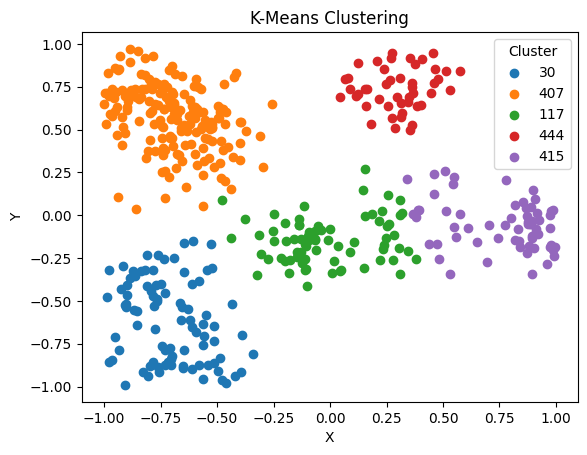

In [13]:
df_kmeans["cluster"] = s_cluster_assignment
unique_clusters = df_kmeans['cluster'].unique()
for cluster in unique_clusters:
    cluster_data = df_kmeans[df_kmeans['cluster'] == cluster]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=str(cluster))

plt.legend(title='Cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')

# Part 2 : DBSCAN

## Q2.1 Load the Density Data and try K-means

Load in the data provided `data_dbscan.csv`, cluster it with k-means algorithm with $k=2$ and visualize the results with a scatter plot, where the color indicates cluster membership. Label your axes, and give the plot a title. 

Text(0.5, 1.0, 'K-Means Clustering')

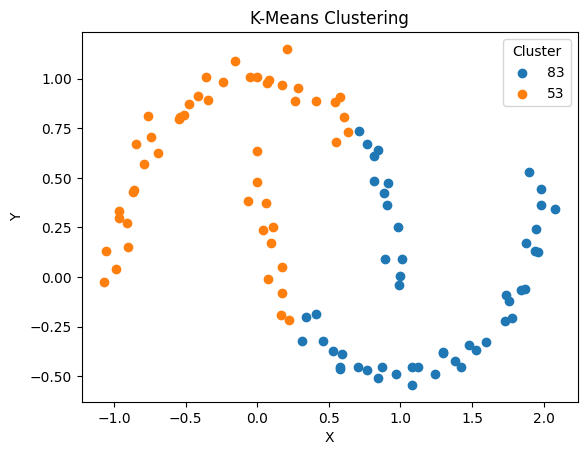

In [14]:
df_dbscan = pd.read_csv('data_dbscan.csv')

# Call k_means with k = 2
s_cluster_assignment = k_means( df_dbscan, 2)

# your code here
df_dbscan["cluster"] = s_cluster_assignment
unique_clusters = df_dbscan['cluster'].unique()
for cluster in unique_clusters:
    cluster_data = df_dbscan[df_dbscan['cluster'] == cluster]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=str(cluster))

plt.legend(title='Cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')

## Q2.2 Write function to Implement Range Query

Using the [pseudo-code](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) on wikipedia, implement RangeQuery.

```
RangeQuery(DB, distFunc, Q, eps) {
    Neighbors N := empty list
    for each point P in database DB {                      /* Scan all points in the database */
        if distFunc(Q, P) ≤ eps then {                     /* Compute distance and check epsilon */
            N := N ∪ {P}                                   /* Add to result */
        }
    }
    return N
}
```

The "DB" parameter is a data frame, `df_data` containing all of the points in our data set, the "distFunc" is set as Euclidean distance thus should not be passed in, the point "Q", is represented by the index of the data frame, `q_index`, where `df_data.iloc[q_index]` is the actual point, and `eps` is a floating point value that indicates the radius from the point "Q" to search for neighbors.  The function will return the slice of `df_data` of all points within `eps` distance of "Q" (including "Q").  The indices on the slice should be preserved (do not reset_index).  

In [15]:
def range_query( df_data, q_index, eps ):
    neigh= []
    for i in df_data.iterrows():
        if math.dist(i[1], df_data.iloc[q_index]) <= eps:
            neigh.append(i[0])
    return df_data.loc[neigh]
    # your code here

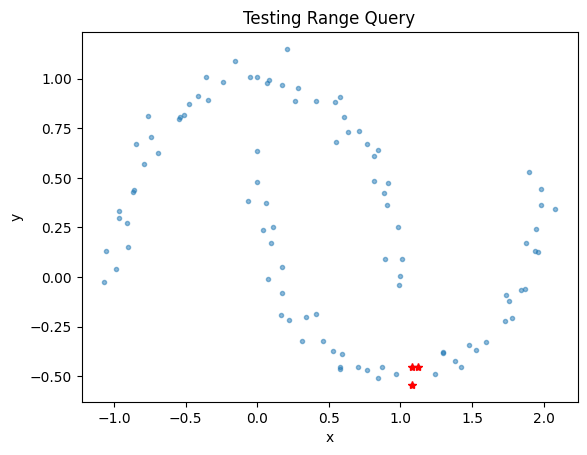

In [16]:
# Test it out
df_dbscan = pd.read_csv('data_dbscan.csv')
df_n = range_query( df_dbscan, 0, 0.1 )
plt.plot( df_dbscan['x'], df_dbscan['y'], '.', alpha = 0.5 )
plt.plot( df_n['x'], df_n['y'], 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Testing Range Query')
plt.show()

## Q2.3 Write a function to implement DBSCAN

Using the [pseudo-code](https://en.wikipedia.org/wiki/DBSCAN#Algorithm) on wikipedia, implement DBSCAN. This algorithm uses set notation, I found a handy summary on-line [here](http://www.math.cmu.edu/~bkell/21110-2010s/sets.html) if you need a refresher. 

```
DBSCAN(DB, distFunc, eps, minPts) {
    C := 0                                                  /* Cluster counter */
    for each point P in database DB {
        if label(P) ≠ undefined then continue               /* Previously processed in inner loop */
        Neighbors N := RangeQuery(DB, distFunc, P, eps)     /* Find neighbors */
        if |N| < minPts then {                              /* Density check */
            label(P) := Noise                               /* Label as Noise */
            continue
        }
        C := C + 1                                          /* next cluster label */
        label(P) := C                                       /* Label initial point */
        SeedSet S := N \ {P}                                /* Neighbors to expand */
        for each point Q in S {                             /* Process every seed point Q */
            if label(Q) = Noise then label(Q) := C          /* Change Noise to border point */
            if label(Q) ≠ undefined then continue           /* Previously processed (e.g., border point) */
            label(Q) := C                                   /* Label neighbor */
            Neighbors N := RangeQuery(DB, distFunc, Q, eps) /* Find neighbors */
            if |N| ≥ minPts then {                          /* Density check (if Q is a core point) */
                S := S ∪ N                                  /* Add new neighbors to seed set */
            }
        }
    }
}
```

The function should accept as parameters "DB", a data frame of points to be clustered, `df_data`, no distance function (assuming Euclidean distance), a floating point `eps` that defines the radius, and an integer `minPts`.  The function will return a series of cluster assignments of the same length as `df_data`. If the data is classified as noise, the cluster assignment is $0$, and all of the clusters will have a label of $1-k$, were $k$ is derived in the function and represents the total number of clusters found. 

Don't forget that [iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) is a lovely way to loop through a data frame. But if you modify the dataframe within the loop, it doesn't add more iterations to the loop.  For example, if you start with a dataframe of length $n$ and add $3$ rows, then the `iterrows` will stop after $n$ rows. For the inside loop, you'll need to use a native python list to dynamically grow the `SeedSet S`.  You can use the `extend` function to merge 2 lists together. For example:

```
x = [1,2,3]
y = [4,5,6]
x.extend(y) # sets x to the list [1, 2, 3, 4, 5, 6]
```

If you haven't used the [continue](https://docs.python.org/3/tutorial/controlflow.html) statement before, it can be useful in these situations, check out the link. 

Call `dbscan` with the `df_dbscan` data frame, `eps` set to 0.23, and `min_pts` set to 6 and save the results to `s_cluster_assignments` 

In [17]:
def dbscan( df_data, eps, min_pts ):
    NOISE_LABEL = 0
    
    # your code here
    cluster = 0
    df_data['label'] = None
    
    for index, _ in df_data.iterrows():
        if df_data.at[index, 'label'] is not None: 
            continue
        neighbors = range_query(df_data.drop(columns='label'), index, eps)
        if len(neighbors) < min_pts:
            df_data.at[index, 'label'] = NOISE_LABEL
        else:
            cluster += 1  
            df_data.at[index, 'label'] = cluster
            seed_set = set(neighbors.index) - {index}
            while seed_set:
                current_index = seed_set.pop()
                if df_data.at[current_index, 'label'] == NOISE_LABEL:
                    df_data.at[current_index, 'label'] = cluster 
                if df_data.at[current_index, 'label'] is not None:
                    continue 
                
                df_data.at[current_index, 'label'] = cluster 
                current_neighbors = range_query(df_data.drop(columns='label'), current_index, eps)
                
                if len(current_neighbors) >= min_pts: 
                    seed_set.update(current_neighbors.index)
    return df_data['label']


In [18]:
# Test it out
s_cluster_assignment = dbscan( df_dbscan, 0.23, 6)
#print(s_cluster_assignment)
s_cluster_assignment.value_counts()

label
1    49
2    48
0     3
Name: count, dtype: int64

## Q2.4 Plot the Results 

Plot the points in the `df_dbscan` data frame using a 2-D scatter plot, with a different color for each cluster.  Use the cluster assignments from the previous problem (`s_cluster_assignments`). Label your axes, and give the plot a title.

Text(0.5, 1.0, 'DBSCAN Clustering')

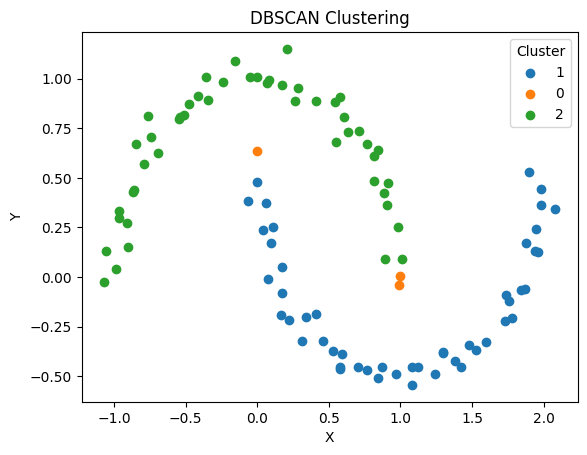

In [23]:
# Plot each cluster
unique_clusters = df_dbscan['label'].unique()
for cluster in unique_clusters:
    cluster_data = df_dbscan[df_dbscan['cluster'] == cluster]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=str(cluster))

plt.legend(title='Cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')

## Q2.5 Compare your results to the scikit-learn library

Import DBSCAN from scikit-learn and compare the cluster labels from your implementation to the cluster labels generated from [scikit-learn's DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Add some commentary about how you think the results compare. Use the same data and values for eps and minPts.

In [20]:
# check your implementation vs scikit-learn
from sklearn.cluster import DBSCAN
# your code here
dbscan = DBSCAN(eps=0.23, min_samples=6)
dbscan.fit(df_dbscan[['x', 'y']])
df_dbscan['sklearn_cluster'] = dbscan.labels_


Text(0.5, 1.0, 'DBSCAN Scikit-Learn')

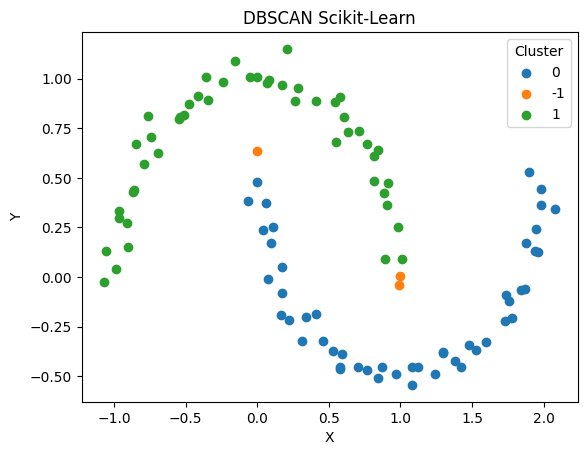

In [21]:
# Plot each cluster
unique_clusters = df_dbscan['sklearn_cluster'].unique()
for cluster in unique_clusters:
    cluster_data = df_dbscan[df_dbscan['sklearn_cluster'] == cluster]
    plt.scatter(cluster_data['x'], cluster_data['y'], label=str(cluster))
plt.legend(title='Cluster')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Scikit-Learn')

your obervations about scikit-learn's performance vs your implementation's performance here

Based on the time taken to perform DBSCAN (1.2 sec for our implementation and 2.1 sec for sci-kit learn implementation) it seems like our implementation occurs much faster than sci-kit learn. The plots look relatively similar with 3 different clusters and the noise points are also similar.